## 분류 실습 : 캐글 신용카드 사기 검출
- https://www.kaggle.com/mlg-ulb/creditcardfraud


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('data/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


### 데이터 정보 확인

In [2]:
card_df.shape

(284807, 31)

In [3]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**피처정보**
- time = 데이터 생성시간 --> 필요없음 삭제
- class = 레이블 값, 타겟
- amount = 카드 트렌젝션 값

### 훈련/ 테스트 데이터 분할

In [4]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace = True)
    return df_copy  # time drop

def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    
    X_features = df_copy.iloc[:,:-1]
    y_target = df_copy.iloc[:, -1]
    
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                       test_size=0.3, random_state=0,
                                                       stratify=y_target)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

**학습/테스트 데이터 레이블 비율 및 개수**
- 레이블의 불균형 확인

In [5]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print(f'학습 데이터 레이블 값 개수 \n{y_train.value_counts()}')
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)
print(f'테스트 데이터 레이블 값 개수 \n{y_test.value_counts()}')

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
학습 데이터 레이블 값 개수 
0    199020
1       344
Name: Class, dtype: int64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64
테스트 데이터 레이블 값 개수 
0    85295
1      148
Name: Class, dtype: int64


### LogisticRegression 알고리즘 적용으로 학습/예측/평가 수행

In [6]:
import sklearn
sklearn.__version__

'0.23.2'

In [7]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

In [8]:
## 평가 지표

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [9]:
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85281    14]
 [   59    89]]
정확도: 0.9991, 정밀도: 0.8641, 재현율: 0.6014,    F1: 0.7092, AUC:0.9586


#### 모델을 학습/예측/평가를 위한 함수 생성

In [10]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test, pred, pred_proba)

### LightGBM 학습/예측/평가

In [11]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train,ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.9790


**중요 속성으로 Amount를 선정해서 분포확인**

<AxesSubplot:xlabel='Amount', ylabel='Density'>

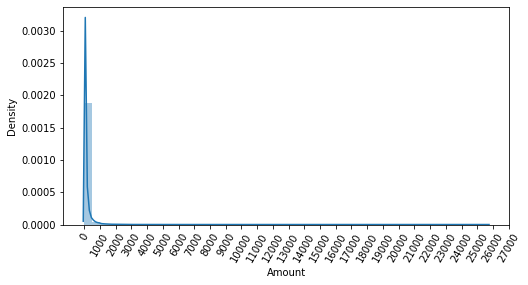

In [12]:
import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000), rotation = 60)
sns.distplot(card_df['Amount'])

#### 전처리 함수 get_preprocessed_df 수정
- StandardScaler를 이용하여 Amount 피처 변환

In [13]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    
    df_copy.insert(0,'Amount_Scaled', amount_n) # 변환된 Amount 열을 인덱스 0번째에 삽입
    
    df_copy.drop(['Time','Amount'], axis=1, inplace = True)
    return df_copy  # time drop


In [14]:
card_df2 = get_preprocessed_df(card_df)
card_df2.head(3)

,Amount_Scaled,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0


In [15]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('==== 로지스틱 회귀 예측 성능 ====')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train,ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print()
print('==== LightGBM 예측 성능 ====')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64,
                         n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train,ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


==== 로지스틱 회귀 예측 성능 ====
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.9702

==== LightGBM 예측 성능 ====
오차 행렬
[[85290     5]
 [   37   111]]
정확도: 0.9995, 정밀도: 0.9569, 재현율: 0.7500,    F1: 0.8409, AUC:0.9779


<AxesSubplot:xlabel='Amount_Scaled', ylabel='Density'>

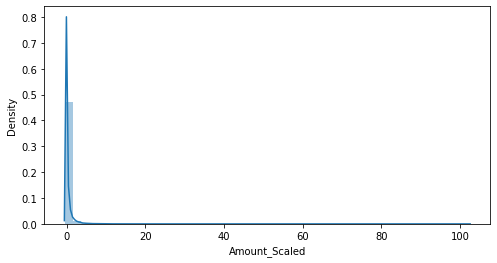

In [16]:
import seaborn as sns

plt.figure(figsize=(8,4))
sns.distplot(card_df2['Amount_Scaled'])

#### 전처리 함수 get_preprocessed_df 수정
- 비대칭 분포를 갖는 Amount 피처를 로그변환

In [17]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    
    # 넘파이의 log1p()를 이용하여 로그 변환
    amount_n = np.log1p(df_copy['Amount'])
    
    df_copy.insert(0,'Amount_Scaled', amount_n) # 변환된 Amount 열을 인덱스 0번째에 삽입
    
    df_copy.drop(['Time','Amount'], axis=1, inplace = True)
    return df_copy  # time drop

### **참고**

In [18]:
# log1p?

In [19]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('==== 로지스틱 회귀 예측 성능 ====')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train,ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print()
print('==== LightGBM 예측 성능 ====')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64,
                         n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train,ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


==== 로지스틱 회귀 예측 성능 ====
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,    F1: 0.7149, AUC:0.9727

==== LightGBM 예측 성능 ====
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635,    F1: 0.8496, AUC:0.9796


<AxesSubplot:xlabel='Amount_Scaled', ylabel='Density'>

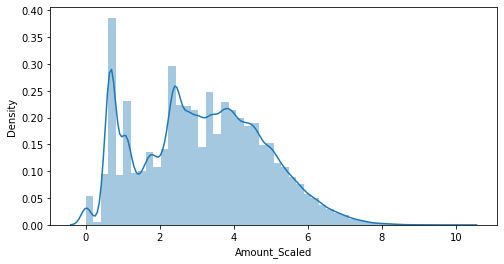

In [20]:
import seaborn as sns

card_df2 = get_preprocessed_df(card_df)
plt.figure(figsize=(8,4))
sns.distplot(card_df2['Amount_Scaled'])

### 이상치 데이터 제거 후 모델 학습/예측/평가
#### 히트맵
- 결정 레이블인 class 값과 가장 상관도가 높은 피처 추출
- 추출한 다음 이중에 상관도가 높은 피처들에 대해서 아웃라이어를 찾음
- 아웃라이어가 높은 피처들을 가지고 있는 레코드 삭제

<AxesSubplot:>

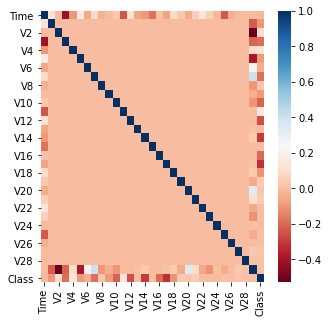

In [21]:
import seaborn as sns

plt.figure(figsize=(5,5))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

### 이상치 필터링을 위한 함수 작성
- DataFrame에서 outlier에 해당하는 데이터 필터링
- oulier index 반환

In [22]:
# import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25) # 1분위수
    quantile_75 = np.percentile(fraud.values, 75) # 3분위수

    # IQR
    iqr = quantile_75-quantile_25
    
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    outlier_index = fraud[(fraud< lowest_val) | (fraud > highest_val)].index
    
    return outlier_index

피처 V14의 분포

In [23]:
np.percentile(card_df['V14'],25)

-0.4255740124549935

In [24]:
np.percentile(card_df['V14'],75)

0.493149849218149

In [25]:
np.max(card_df['V14'])  # 데이터가 치우쳐져 있다.

10.5267660517847

In [26]:
outlier_index = get_outlier(df=card_df, column='V14')

In [27]:
print(f'이상치 데이터 인덱스 : {outlier_index}')

이상치 데이터 인덱스 : Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [28]:
card_df['V14'].iloc[[8296, 8615, 9035, 9252]]

8296   -19.214325
8615   -18.822087
9035   -18.493773
9252   -18.049998
Name: V14, dtype: float64

#### 전처리 함수 get_preprocessed_df 수정
- 이상치 처리 추가

In [29]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    
    # 넘파이의 log1p()를 이용하여 로그 변환
    amount_n = np.log1p(df_copy['Amount'])
    
    df_copy.insert(0,'Amount_Scaled', amount_n) # 변환된 Amount 열을 인덱스 0번째에 삽입
    df_copy.drop(['Time','Amount'], axis=1, inplace = True)
    
    outlier_index = get_outlier(df=card_df, column='V14')
    df_copy.drop(outlier_index, axis =0, inplace=True)  # 행 삭제
    return df_copy  # time drop

In [30]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('==== 로지스틱 회귀 예측 성능 ====')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train,ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print()
print('==== LightGBM 예측 성능 ====')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64,
                         n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train,ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


==== 로지스틱 회귀 예측 성능 ====
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,    F1: 0.7597, AUC:0.9743

==== LightGBM 예측 성능 ====
오차 행렬
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288,    F1: 0.8897, AUC:0.9780


### SMOTE 오버 샘플링 적용

In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print(f'SMOTE 적용 전 학습용 피처/레이블 데이터 셋 : {X_train.shape}, {y_train.shape}')
print(f'SMOTE 적용 전 학습용 레이블 분포 : \n{pd.Series(y_train).value_counts()}')
print(f'SMOTE 적용 후 학습용 피처/레이블 데이터 셋 : {X_train_over.shape}, {y_train_over.shape}')
print(f'SMOTE 적용 후 학습용 레이블 분포 : \n{pd.Series(y_train_over).value_counts()}')


SMOTE 적용 전 학습용 피처/레이블 데이터 셋 : (199362, 29), (199362,)
SMOTE 적용 전 학습용 레이블 분포 : 
0    199020
1       342
Name: Class, dtype: int64
SMOTE 적용 후 학습용 피처/레이블 데이터 셋 : (398040, 29), (398040,)
SMOTE 적용 후 학습용 레이블 분포 : 
0    199020
1    199020
Name: Class, dtype: int64


### 로지스틱 회귀 성능 평가

In [36]:
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train_over,ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)


오차 행렬
[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.9247,    F1: 0.1023, AUC:0.9737


**Precision-Recall 곡선 시각화**
- sklearn-> predict_proba에 있음

In [37]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

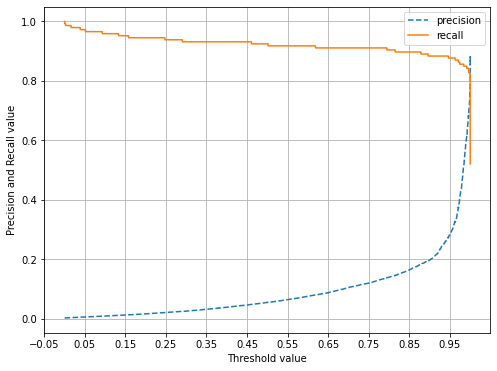

In [38]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

### LightGBM 모델 적용

In [39]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64,
                         n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over,ftr_test=X_test,
                     tgt_train=y_train_over, tgt_test=y_test)


오차 행렬
[[85283    12]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9118, 재현율: 0.8493,    F1: 0.8794, AUC:0.9814


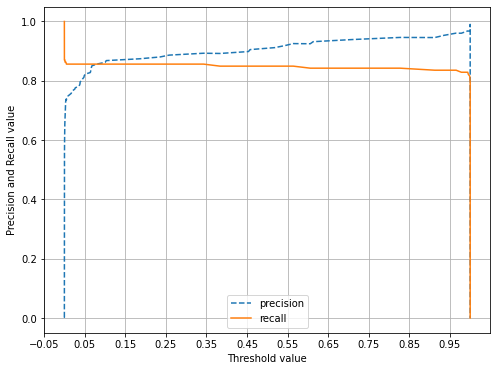

In [40]:
precision_recall_curve_plot(y_test, lgbm_clf.predict_proba(X_test)[:,1])